In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")
%matplotlib inline
import matplotlib.pyplot as plt
from fastai.vision import *
import torch
from torchsummary import summary
torch.cuda.set_device(1)
torch.manual_seed(0)
torch.cuda.manual_seed(0)

from models.custom_resnet import *
from utils import _get_accuracy

In [2]:
def check(model_name, dataset) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(path, train = 'train', valid = val, bs = 64, size = sz, ds_tfms = tfms).normalize(stats)
    
    if model_name == 'resnet10' :
        net = resnet10(pretrained = False, progress = False)
    elif model_name == 'resnet14' : 
        net = resnet14(pretrained = False, progress = False)
    elif model_name == 'resnet18' :
        net = resnet18(pretrained = False, progress = False)
    elif model_name == 'resnet20' :
        net = resnet20(pretrained = False, progress = False)
    elif model_name == 'resnet26' :
        net = resnet26(pretrained = False, progress = False)
    savename = '../saved_models/' + dataset + '/' + model_name + '_classifier/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('stagewise : ', _get_accuracy(data.valid_dl, net))
    stagewise_acc = _get_accuracy(data.valid_dl, net)
    
    savename = '../saved_models/' + dataset + '/' + model_name + '_no_teacher/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('no_teacher : ', _get_accuracy(data.valid_dl, net))
    noteacher_acc = _get_accuracy(data.valid_dl, net)
    
    return noteacher_acc, stagewise_acc

In [9]:
print(check('resnet10', 'imagenette'))
print(check('resnet14', 'imagenette'))
print(check('resnet18', 'imagenette'))
print(check('resnet20', 'imagenette'))
print(check('resnet26', 'imagenette'))

(0.918, 0.974)
(0.912, 0.988)
(0.914, 0.988)
(0.916, 0.988)
(0.906, 0.99)


In [10]:
print(check('resnet10', 'imagewoof'))
print(check('resnet14', 'imagewoof'))
print(check('resnet18', 'imagewoof'))
print(check('resnet20', 'imagewoof'))
print(check('resnet26', 'imagewoof'))

(0.802, 0.906)
(0.786, 0.928)
(0.792, 0.924)
(0.798, 0.92)
(0.802, 0.934)


In [5]:
a1, a2 = check('resnet10', 'imagewoof')
b1, b2 = check('resnet14', 'imagewoof')
c1, c2 = check('resnet18', 'imagewoof')
d1, d2 = check('resnet20', 'imagewoof')
e1, e2 = check('resnet26', 'imagewoof')
print(a1, ',', b1, ',', c1, ',', d1, ',', e1)
print(a2, ',', b2, ',', c2, ',', d2, ',', e2)

0.802 , 0.786 , 0.792 , 0.798 , 0.802
0.906 , 0.928 , 0.924 , 0.92 , 0.934


In [11]:
print(check('resnet10', 'cifar10'))
print(check('resnet14', 'cifar10'))
print(check('resnet18', 'cifar10'))
print(check('resnet20', 'cifar10'))
print(check('resnet26', 'cifar10'))

(0.7788, 0.8475)
(0.775, 0.8497)
(0.7735, 0.8599)
(0.7808, 0.8646)
(0.783, 0.8662)


In [6]:
a1, a2 = check('resnet10', 'cifar10')
b1, b2 = check('resnet14', 'cifar10')
c1, c2 = check('resnet18', 'cifar10')
d1, d2 = check('resnet20', 'cifar10')
e1, e2 = check('resnet26', 'cifar10')
print(a1, ',', b1, ',', c1, ',', d1, ',', e1)
print(a2, ',', b2, ',', c2, ',', d2, ',', e2)

0.7788 , 0.775 , 0.7735 , 0.7808 , 0.783
0.8475 , 0.8497 , 0.8599 , 0.8646 , 0.8662


In [8]:
def check_ld(model_name, dataset) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    new_path = path/'new'
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(new_path, train = 'train', valid = 'val', test = 'test', bs = 64, size = sz, ds_tfms = tfms).normalize(stats)
    
    if model_name == 'resnet10' :
        net = resnet10(pretrained = False, progress = False)
    elif model_name == 'resnet14' : 
        net = resnet14(pretrained = False, progress = False)
    elif model_name == 'resnet18' :
        net = resnet18(pretrained = False, progress = False)
    elif model_name == 'resnet20' :
        net = resnet20(pretrained = False, progress = False)
    elif model_name == 'resnet26' :
        net = resnet26(pretrained = False, progress = False)
    savename = '../saved_models/' + dataset + '/less_data/' + model_name + '_classifier/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('stagewise : ', _get_accuracy(data.valid_dl, net))
    ld_stagewise_acc = _get_accuracy(data.valid_dl, net)
    
    savename = '../saved_models/' + dataset + '/less_data/' + model_name + '_no_teacher/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('no_teacher : ', _get_accuracy(data.valid_dl, net))
    ld_noteacher_acc = _get_accuracy(data.valid_dl, net)
    
    return ld_noteacher_acc, ld_stagewise_acc

In [13]:
print(check_ld('resnet10', 'imagenette'))
print(check_ld('resnet14', 'imagenette'))
print(check_ld('resnet18', 'imagenette'))
print(check_ld('resnet20', 'imagenette'))
print(check_ld('resnet26', 'imagenette'))

(0.848, 0.954)
(0.85, 0.95)
(0.854, 0.956)
(0.85, 0.958)
(0.832, 0.96)


In [9]:
a1, a2 = check_ld('resnet10', 'imagenette')
b1, b2 = check_ld('resnet14', 'imagenette')
c1, c2 = check_ld('resnet18', 'imagenette')
d1, d2 = check_ld('resnet20', 'imagenette')
e1, e2 = check_ld('resnet26', 'imagenette')
print(a1, ',', b1, ',', c1, ',', d1, ',', e1)
print(a2, ',', b2, ',', c2, ',', d2, ',', e2)

0.848 , 0.85 , 0.854 , 0.85 , 0.832
0.954 , 0.95 , 0.956 , 0.958 , 0.96


In [14]:
print(check_ld('resnet10', 'imagewoof'))
print(check_ld('resnet14', 'imagewoof'))
print(check_ld('resnet18', 'imagewoof'))
print(check_ld('resnet20', 'imagewoof'))
print(check_ld('resnet26', 'imagewoof'))

(0.632, 0.858)
(0.616, 0.89)
(0.602, 0.89)
(0.6, 0.876)
(0.588, 0.898)


In [10]:
a1, a2 = check_ld('resnet10', 'imagewoof')
b1, b2 = check_ld('resnet14', 'imagewoof')
c1, c2 = check_ld('resnet18', 'imagewoof')
d1, d2 = check_ld('resnet20', 'imagewoof')
e1, e2 = check_ld('resnet26', 'imagewoof')
print(a1, ',', b1, ',', c1, ',', d1, ',', e1)
print(a2, ',', b2, ',', c2, ',', d2, ',', e2)

0.632 , 0.616 , 0.602 , 0.6 , 0.588
0.858 , 0.89 , 0.89 , 0.876 , 0.898


In [17]:
print(check_ld('resnet10', 'cifar10'))
print(check_ld('resnet14', 'cifar10'))
print(check_ld('resnet18', 'cifar10'))
print(check_ld('resnet20', 'cifar10'))
print(check_ld('resnet26', 'cifar10'))

(0.6635, 0.8159)
(0.6489, 0.8255)
(0.6466, 0.8328)
(0.652, 0.8324)
(0.6409, 0.8364)


In [11]:
a1, a2 = check_ld('resnet10', 'cifar10')
b1, b2 = check_ld('resnet14', 'cifar10')
c1, c2 = check_ld('resnet18', 'cifar10')
d1, d2 = check_ld('resnet20', 'cifar10')
e1, e2 = check_ld('resnet26', 'cifar10')
print(a1, ',', b1, ',', c1, ',', d1, ',', e1)
print(a2, ',', b2, ',', c2, ',', d2, ',', e2)

0.6635 , 0.6489 , 0.6466 , 0.6519 , 0.6409
0.8159 , 0.8255 , 0.8328 , 0.8324 , 0.8364


In [2]:
def check_ld8(model_name, dataset) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    new_path = path/'new8'
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(new_path, train = 'train', valid = 'val', test = 'test', bs = 64, size = sz, ds_tfms = tfms).normalize(stats)
    
    if model_name == 'resnet10' :
        net = resnet10(pretrained = False, progress = False)
    elif model_name == 'resnet14' : 
        net = resnet14(pretrained = False, progress = False)
    elif model_name == 'resnet18' :
        net = resnet18(pretrained = False, progress = False)
    elif model_name == 'resnet20' :
        net = resnet20(pretrained = False, progress = False)
    elif model_name == 'resnet26' :
        net = resnet26(pretrained = False, progress = False)
    savename = '../saved_models/' + dataset + '/less_data8/' + model_name + '_classifier/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('stagewise : ', _get_accuracy(data.valid_dl, net))
    ld_stagewise_acc = _get_accuracy(data.valid_dl, net)
    
    savename = '../saved_models/' + dataset + '/less_data8/' + model_name + '_no_teacher/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('no_teacher : ', _get_accuracy(data.valid_dl, net))
    ld_noteacher_acc = _get_accuracy(data.valid_dl, net)
    
    return ld_noteacher_acc, ld_stagewise_acc

In [2]:
def check_simultaneous(model_name, dataset) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(path, train = 'train', valid = val, bs = 64, size = sz, ds_tfms = tfms).normalize(stats)
    
    if model_name == 'resnet10' :
        net = resnet10(pretrained = False, progress = False)
    elif model_name == 'resnet14' : 
        net = resnet14(pretrained = False, progress = False)
    elif model_name == 'resnet18' :
        net = resnet18(pretrained = False, progress = False)
    elif model_name == 'resnet20' :
        net = resnet20(pretrained = False, progress = False)
    elif model_name == 'resnet26' :
        net = resnet26(pretrained = False, progress = False)
    savename = '../saved_models/' + dataset + '/simultaneous/' + model_name + '_classifier/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('stagewise : ', _get_accuracy(data.valid_dl, net))
    stagewise_acc = _get_accuracy(data.valid_dl, net)
        
    return stagewise_acc

In [2]:
def check_trad_kd(model_name, dataset) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(path, train = 'train', valid = val, bs = 64, size = sz, ds_tfms = tfms).normalize(stats)
    
    if model_name == 'resnet10' :
        net = resnet10(pretrained = False, progress = False)
    elif model_name == 'resnet14' : 
        net = resnet14(pretrained = False, progress = False)
    elif model_name == 'resnet18' :
        net = resnet18(pretrained = False, progress = False)
    elif model_name == 'resnet20' :
        net = resnet20(pretrained = False, progress = False)
    elif model_name == 'resnet26' :
        net = resnet26(pretrained = False, progress = False)
    savename = '../saved_models/' + dataset + '/trad_kd/' + model_name + '_classifier/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('stagewise : ', _get_accuracy(data.valid_dl, net))
    stagewise_acc = _get_accuracy(data.valid_dl, net)
        
    return stagewise_acc

In [4]:
def check_trad_kd_ld(model_name, dataset) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    new_path = path/'new8'
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(new_path, train = 'train', valid = 'val', test = 'test', bs = 64, size = sz, ds_tfms = tfms).normalize(stats)
    
    if model_name == 'resnet10' :
        net = resnet10(pretrained = False, progress = False)
    elif model_name == 'resnet14' : 
        net = resnet14(pretrained = False, progress = False)
    elif model_name == 'resnet18' :
        net = resnet18(pretrained = False, progress = False)
    elif model_name == 'resnet20' :
        net = resnet20(pretrained = False, progress = False)
    elif model_name == 'resnet26' :
        net = resnet26(pretrained = False, progress = False)
    savename = '../saved_models/' + dataset + '/trad_kd_ld/' + model_name + '_classifier/model1.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('stagewise : ', _get_accuracy(data.valid_dl, net))
    ld_stagewise_acc = _get_accuracy(data.valid_dl, net)
    
    return ld_stagewise_acc

In [7]:
print(check_simultaneous('resnet10', 'imagenette'))
print(check_simultaneous('resnet14', 'imagenette'))
print(check_simultaneous('resnet18', 'imagenette'))
print(check_simultaneous('resnet20', 'imagenette'))
print(check_simultaneous('resnet26', 'imagenette'))

0.922
0.932
0.924
0.924
0.918


In [3]:
print(check_trad_kd('resnet10', 'imagenette'))
print(check_trad_kd('resnet14', 'imagenette'))
print(check_trad_kd('resnet18', 'imagenette'))
print(check_trad_kd('resnet20', 'imagenette'))
print(check_trad_kd('resnet26', 'imagenette'))

0.912
0.9
0.902
0.912
0.9


In [4]:
print(check_trad_kd('resnet10', 'imagewoof'))
print(check_trad_kd('resnet14', 'imagewoof'))
print(check_trad_kd('resnet18', 'imagewoof'))
print(check_trad_kd('resnet20', 'imagewoof'))
print(check_trad_kd('resnet26', 'imagewoof'))

0.772
0.784
0.794
0.788
0.778


In [5]:
print(check_trad_kd('resnet10', 'cifar10'))
print(check_trad_kd('resnet14', 'cifar10'))
print(check_trad_kd('resnet18', 'cifar10'))
print(check_trad_kd('resnet20', 'cifar10'))
print(check_trad_kd('resnet26', 'cifar10'))

0.7622
0.7708
0.7738
0.7722
0.7759


In [5]:
print(check_trad_kd_ld('resnet10', 'imagenette'))
print(check_trad_kd_ld('resnet14', 'imagenette'))
print(check_trad_kd_ld('resnet18', 'imagenette'))
print(check_trad_kd_ld('resnet20', 'imagenette'))
print(check_trad_kd_ld('resnet26', 'imagenette'))

0.79
0.8
0.792
0.792
0.774


In [4]:
print(check_trad_kd_ld('resnet10', 'imagewoof'))
print(check_trad_kd_ld('resnet14', 'imagewoof'))
print(check_trad_kd_ld('resnet18', 'imagewoof'))
print(check_trad_kd_ld('resnet20', 'imagewoof'))
print(check_trad_kd_ld('resnet26', 'imagewoof'))

0.496
0.512
0.496
0.49
0.484


In [5]:
print(check_trad_kd_ld('resnet10', 'cifar10'))
print(check_trad_kd_ld('resnet14', 'cifar10'))
print(check_trad_kd_ld('resnet18', 'cifar10'))
print(check_trad_kd_ld('resnet20', 'cifar10'))
print(check_trad_kd_ld('resnet26', 'cifar10'))

0.5611
0.5606
0.5639
0.5683
0.5538


In [4]:
a1 = check_simultaneous('resnet10', 'imagenette')
b1 = check_simultaneous('resnet14', 'imagenette')
c1 = check_simultaneous('resnet18', 'imagenette')
d1 = check_simultaneous('resnet20', 'imagenette')
e1 = check_simultaneous('resnet26', 'imagenette')
print(a1, ',', b1, ',', c1, ',', d1, ',', e1)

0.922 , 0.932 , 0.924 , 0.924 , 0.918


In [15]:
print(check_simultaneous('resnet10', 'imagewoof'))
print(check_simultaneous('resnet14', 'imagewoof'))
print(check_simultaneous('resnet18', 'imagewoof'))
print(check_simultaneous('resnet20', 'imagewoof'))
print(check_simultaneous('resnet26', 'imagewoof'))

0.798
0.796
0.81
0.814
0.842


In [5]:
a1 = check_simultaneous('resnet10', 'imagewoof')
b1 = check_simultaneous('resnet14', 'imagewoof')
c1 = check_simultaneous('resnet18', 'imagewoof')
d1 = check_simultaneous('resnet20', 'imagewoof')
e1 = check_simultaneous('resnet26', 'imagewoof')
print(a1, ',', b1, ',', c1, ',', d1, ',', e1)

0.798 , 0.796 , 0.81 , 0.814 , 0.842


In [16]:
print(check_simultaneous('resnet10', 'cifar10'))
print(check_simultaneous('resnet14', 'cifar10'))
print(check_simultaneous('resnet18', 'cifar10'))
print(check_simultaneous('resnet20', 'cifar10'))
print(check_simultaneous('resnet26', 'cifar10'))

0.7732
0.7598
0.7647
0.7679
0.7694


In [6]:
a1 = check_simultaneous('resnet10', 'cifar10')
b1 = check_simultaneous('resnet14', 'cifar10')
c1 = check_simultaneous('resnet18', 'cifar10')
d1 = check_simultaneous('resnet20', 'cifar10')
e1 = check_simultaneous('resnet26', 'cifar10')
print(a1, ',', b1, ',', c1, ',', d1, ',', e1)

0.7732 , 0.7598 , 0.7647 , 0.7679 , 0.7694


In [4]:
def check_teacher(model_name, dataset) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(path, train = 'train', valid = val, bs = 64, size = sz, ds_tfms = tfms).normalize(stats)

    if model_name == 'resnet34' :
        learn = cnn_learner(data, models.resnet34, metrics = accuracy)
        learn = learn.load('resnet34_' + load_name + '_bs64')
        learn.freeze()
        net = learn.model
    
    net = net.cuda()
    return(_get_accuracy(data.valid_dl, net))

In [16]:
print(check_teacher('resnet34', 'imagenette'))
print(check_teacher('resnet34', 'imagewoof'))
print(check_teacher('resnet34', 'cifar10'))

0.992
0.914
0.8751


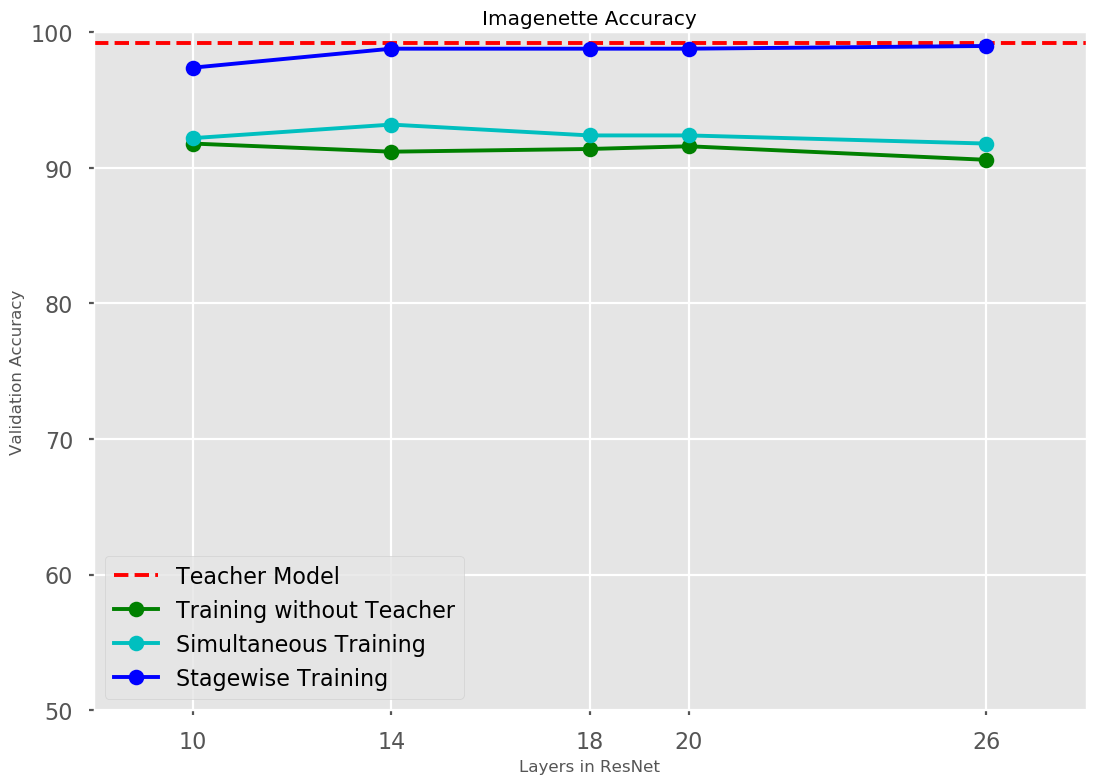

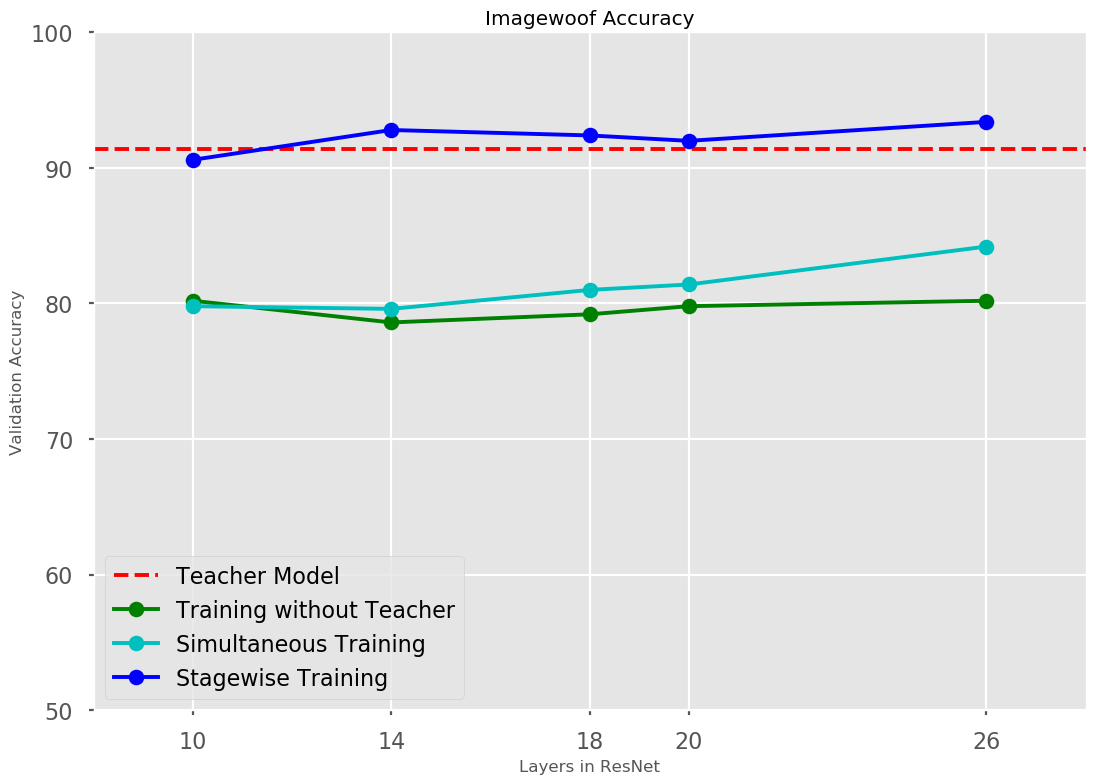

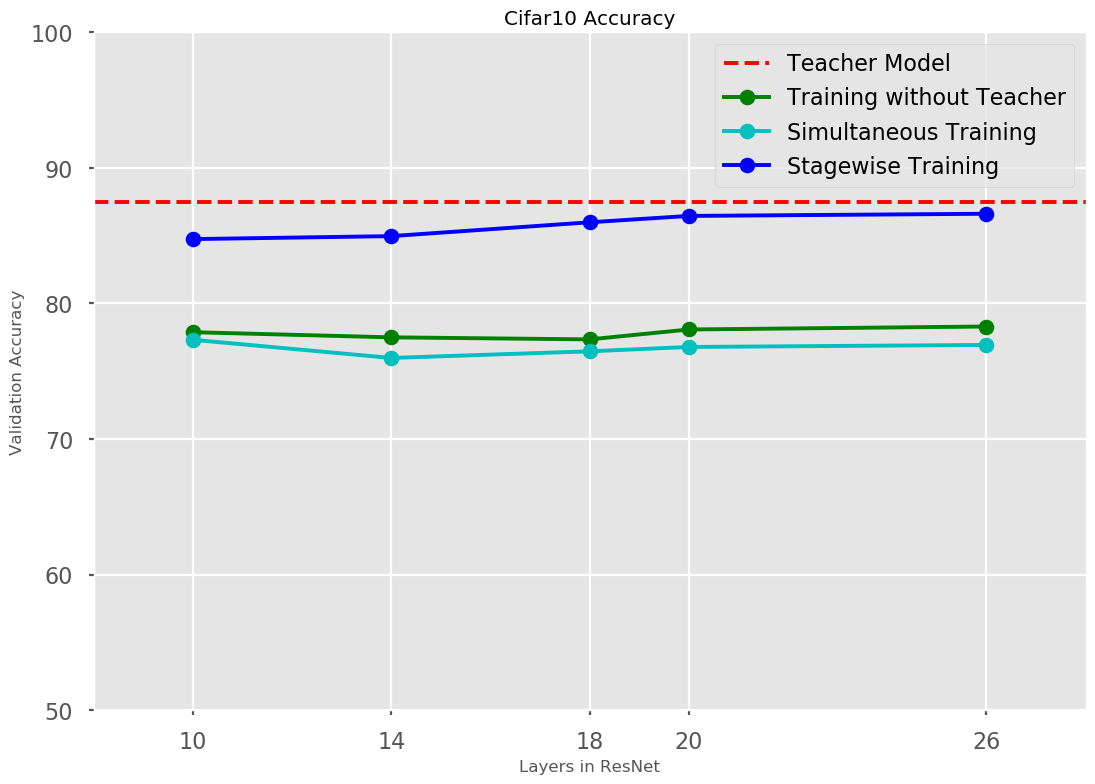

In [10]:
for dataset in ['imagenette', 'imagewoof', 'cifar10'] :
    imagenette_acc_stagewise = list()
    imagenette_acc_simultaneous = list()
    imagenette_acc_noteacher = list()
    for model in ['resnet10', 'resnet14', 'resnet18', 'resnet20', 'resnet26'] :
        noteacher_acc, stagewise_acc = check(model, dataset)
        simul_acc = check_simultaneous(model, dataset)
        imagenette_acc_noteacher.append(noteacher_acc * 100)
        imagenette_acc_stagewise.append(stagewise_acc * 100)
        imagenette_acc_simultaneous.append(simul_acc * 100)

    teacher_acc = check_teacher('resnet34', dataset) * 100

    layers = [10, 14, 18, 20, 26]

    with plt.style.context('ggplot'):
        fig, ax = plt.subplots()
        title_ = dataset[0].upper() + dataset[1 : ] + ' Accuracy'
        ax.set(xlim = [8, 28], ylim = [50, 100], xlabel = 'Layers in ResNet', ylabel = 'Validation Accuracy', title = title_)
        ax.axhline(teacher_acc, ls = '--', color = 'r', label = 'Teacher Model')
        ax.plot(layers, imagenette_acc_noteacher, 'go-', label = 'Training without Teacher')
        ax.plot(layers, imagenette_acc_simultaneous, 'co-', label = 'Simultaneous Training')
        ax.plot(layers, imagenette_acc_stagewise, 'bo-', label = 'Stagewise Training')
        plt.xticks(layers)
        ax.legend(loc = 'best')
    plt.show()

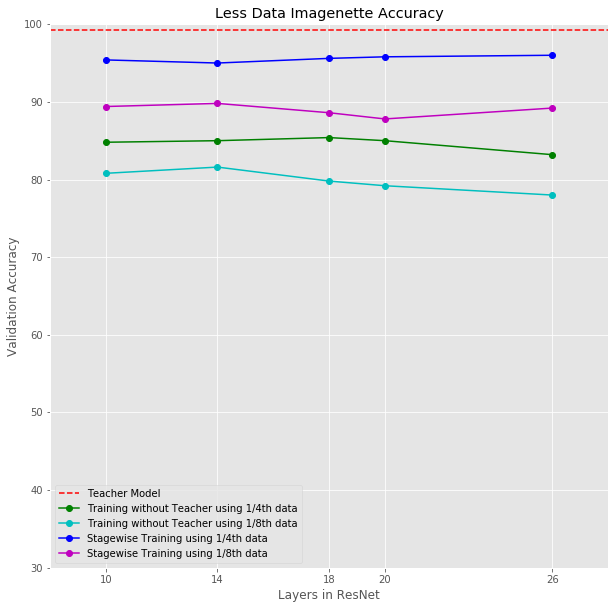

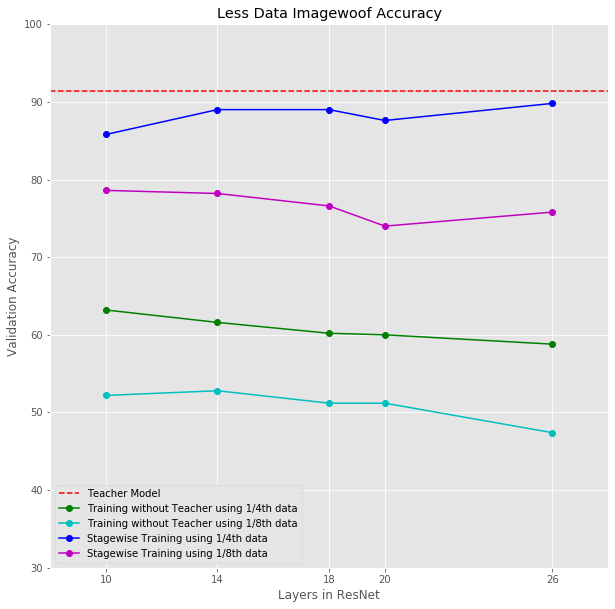

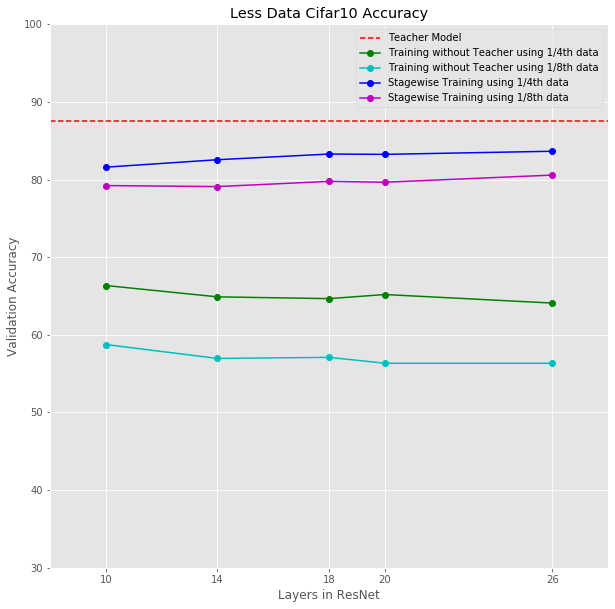

In [13]:
for dataset in ['imagenette', 'imagewoof', 'cifar10'] :
    imagenette_acc_stagewise = list()
    imagenette_acc_stagewise8 = list()
    imagenette_acc_noteacher = list()
    imagenette_acc_noteacher8 = list()
    for model in ['resnet10', 'resnet14', 'resnet18', 'resnet20', 'resnet26'] :
        noteacher_acc, stagewise_acc = check_ld(model, dataset)
        noteacher_acc8, stagewise_acc8 = check_ld8(model, dataset)
        imagenette_acc_noteacher.append(noteacher_acc * 100)
        imagenette_acc_noteacher8.append(noteacher_acc8 * 100)
        imagenette_acc_stagewise.append(stagewise_acc * 100)
        imagenette_acc_stagewise8.append(stagewise_acc8 * 100)

    teacher_acc = check_teacher('resnet34', dataset) * 100

    layers = [10, 14, 18, 20, 26]

    with plt.style.context('ggplot') :
        fig, ax = plt.subplots(figsize = (10, 10))
        title_ = 'Less Data ' + dataset[0].upper() + dataset[1 : ] + ' Accuracy'
        ax.set(xlim = [8, 28], ylim = [30, 100], xlabel = 'Layers in ResNet', ylabel = 'Validation Accuracy', title = title_)
        ax.axhline(teacher_acc, ls = '--', color = 'r', label = 'Teacher Model')
        ax.plot(layers, imagenette_acc_noteacher, 'go-', label = 'Training without Teacher using 1/4th data')
        ax.plot(layers, imagenette_acc_noteacher8, 'co-', label = 'Training without Teacher using 1/8th data')
        ax.plot(layers, imagenette_acc_stagewise, 'bo-', label = 'Stagewise Training using 1/4th data')
        ax.plot(layers, imagenette_acc_stagewise8, 'mo-', label = 'Stagewise Training using 1/8th data')
        plt.xticks(layers)
        ax.legend(loc = 'best')
    plt.show()

In [3]:
def check_ldp(model_name, dataset, perc) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    new_path = path/('new' + str(perc))
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(new_path, train = 'train', valid = 'val', test = 'test', bs = 64, size = sz, ds_tfms = tfms).normalize(stats)
    
    if model_name == 'resnet10' :
        net = resnet10(pretrained = False, progress = False)
    elif model_name == 'resnet14' : 
        net = resnet14(pretrained = False, progress = False)
    elif model_name == 'resnet18' :
        net = resnet18(pretrained = False, progress = False)
    elif model_name == 'resnet20' :
        net = resnet20(pretrained = False, progress = False)
    elif model_name == 'resnet26' :
        net = resnet26(pretrained = False, progress = False)
    savename = '../saved_models/' + dataset + '/less_data' + str(perc) + '/' + model_name + '_classifier/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('stagewise : ', _get_accuracy(data.valid_dl, net))
    ld_stagewise_acc = _get_accuracy(data.valid_dl, net)
    
    savename = '../saved_models/' + dataset + '/less_data' + str(perc) + '/' + model_name + '_no_teacher/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('no_teacher : ', _get_accuracy(data.valid_dl, net))
    ld_noteacher_acc = _get_accuracy(data.valid_dl, net)
    
    return ld_noteacher_acc, ld_stagewise_acc
#     return ld_noteacher_acc

In [4]:
print('10 percent :')
print(check_ldp('resnet10', 'imagenette', 10))
print(check_ldp('resnet14', 'imagenette', 10))
print(check_ldp('resnet18', 'imagenette', 10))
print(check_ldp('resnet20', 'imagenette', 10))
print(check_ldp('resnet26', 'imagenette', 10))

# print('20 percent :')
# print(check_ldp('resnet10', 'imagenette', 20))
# print(check_ldp('resnet14', 'imagenette', 20))
# print(check_ldp('resnet18', 'imagenette', 20))
# print(check_ldp('resnet20', 'imagenette', 20))
# print(check_ldp('resnet26', 'imagenette', 20))

# print('30 percent :')
# print(check_ldp('resnet10', 'imagenette', 30))
# print(check_ldp('resnet14', 'imagenette', 30))
# print(check_ldp('resnet18', 'imagenette', 30))
# print(check_ldp('resnet20', 'imagenette', 30))
# print(check_ldp('resnet26', 'imagenette', 30))

# print('40 percent :')
# print(check_ldp('resnet10', 'imagenette', 40))
# print(check_ldp('resnet14', 'imagenette', 40))
# print(check_ldp('resnet18', 'imagenette', 40))
# print(check_ldp('resnet20', 'imagenette', 40))
# print(check_ldp('resnet26', 'imagenette', 40))

10 percent :
(0.804, 0.866)
(0.79, 0.878)
(0.764, 0.826)
(0.77, 0.836)
(0.748, 0.854)


In [5]:
print('10 percent :')
print(check_ldp('resnet10', 'imagewoof', 10))
print(check_ldp('resnet14', 'imagewoof', 10))
print(check_ldp('resnet18', 'imagewoof', 10))
print(check_ldp('resnet20', 'imagewoof', 10))
print(check_ldp('resnet26', 'imagewoof', 10))

# print('20 percent :')
# print(check_ldp('resnet10', 'imagewoof', 20))
# print(check_ldp('resnet14', 'imagewoof', 20))
# print(check_ldp('resnet18', 'imagewoof', 20))
# print(check_ldp('resnet20', 'imagewoof', 20))
# print(check_ldp('resnet26', 'imagewoof', 20))

# print('30 percent :')
# print(check_ldp('resnet10', 'imagewoof', 30))
# print(check_ldp('resnet14', 'imagewoof', 30))
# print(check_ldp('resnet18', 'imagewoof', 30))
# print(check_ldp('resnet20', 'imagewoof', 30))
# print(check_ldp('resnet26', 'imagewoof', 30))

# print('40 percent :')
# print(check_ldp('resnet10', 'imagewoof', 40))
# print(check_ldp('resnet14', 'imagewoof', 40))
# print(check_ldp('resnet18', 'imagewoof', 40))
# print(check_ldp('resnet20', 'imagewoof', 40))
# print(check_ldp('resnet26', 'imagewoof', 40))

10 percent :
(0.482, 0.704)
(0.452, 0.686)
(0.438, 0.644)
(0.46, 0.638)
(0.428, 0.638)


In [12]:
print('10 percent :')
print(check_ldp('resnet10', 'cifar10', 10))
print(check_ldp('resnet14', 'cifar10', 10))
print(check_ldp('resnet18', 'cifar10', 10))
print(check_ldp('resnet20', 'cifar10', 10))
print(check_ldp('resnet26', 'cifar10', 10))

print('20 percent :')
print(check_ldp('resnet10', 'cifar10', 20))
print(check_ldp('resnet14', 'cifar10', 20))
print(check_ldp('resnet18', 'cifar10', 20))
print(check_ldp('resnet20', 'cifar10', 20))
print(check_ldp('resnet26', 'cifar10', 20))

print('30 percent :')
print(check_ldp('resnet10', 'cifar10', 30))
print(check_ldp('resnet14', 'cifar10', 30))
print(check_ldp('resnet18', 'cifar10', 30))
print(check_ldp('resnet20', 'cifar10', 30))
print(check_ldp('resnet26', 'cifar10', 30))

print('40 percent :')
print(check_ldp('resnet10', 'cifar10', 40))
print(check_ldp('resnet14', 'cifar10', 40))
print(check_ldp('resnet18', 'cifar10', 40))
print(check_ldp('resnet20', 'cifar10', 40))
print(check_ldp('resnet26', 'cifar10', 40))

10 percent :
(0.5745, 0.7774)
(0.5622, 0.7715)
(0.5553, 0.7777)
(0.5476, 0.7805)
(0.5305, 0.7817)
20 percent :
(0.6329, 0.8153)
(0.6226, 0.8132)
(0.6155, 0.8212)
(0.6199, 0.824)
(0.6144, 0.8243)
30 percent :
(0.6732, 0.8248)
(0.6664, 0.8274)
(0.6637, 0.8348)
(0.669, 0.8349)
(0.6652, 0.8442)
40 percent :
(0.6948, 0.8295)
(0.6905, 0.8358)
(0.6942, 0.8416)
(0.6954, 0.8482)
(0.6964, 0.8519)


In [17]:
def check_trad_ldp(model_name, dataset, perc) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    new_path = path/('new' + str(perc))
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(new_path, train = 'train', valid = 'val', test = 'test', bs = 64, size = sz, ds_tfms = tfms).normalize(stats)
    
    if model_name == 'resnet10' :
        net = resnet10(pretrained = False, progress = False)
    elif model_name == 'resnet14' : 
        net = resnet14(pretrained = False, progress = False)
    elif model_name == 'resnet18' :
        net = resnet18(pretrained = False, progress = False)
    elif model_name == 'resnet20' :
        net = resnet20(pretrained = False, progress = False)
    elif model_name == 'resnet26' :
        net = resnet26(pretrained = False, progress = False)
    savename = '../saved_models/' + dataset + '/trad_kd_ld' + str(perc) + '/' + model_name + '_classifier/model1.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('stagewise : ', _get_accuracy(data.valid_dl, net))
    ld_stagewise_acc = _get_accuracy(data.valid_dl, net)
        
    return ld_stagewise_acc

In [18]:
print('10 percent :')
print(check_trad_ldp('resnet10', 'imagenette', 10))
print(check_trad_ldp('resnet14', 'imagenette', 10))
print(check_trad_ldp('resnet18', 'imagenette', 10))
print(check_trad_ldp('resnet20', 'imagenette', 10))
print(check_trad_ldp('resnet26', 'imagenette', 10))

print('20 percent :')
print(check_trad_ldp('resnet10', 'imagenette', 20))
print(check_trad_ldp('resnet14', 'imagenette', 20))
print(check_trad_ldp('resnet18', 'imagenette', 20))
print(check_trad_ldp('resnet20', 'imagenette', 20))
print(check_trad_ldp('resnet26', 'imagenette', 20))

print('30 percent :')
print(check_trad_ldp('resnet10', 'imagenette', 30))
print(check_trad_ldp('resnet14', 'imagenette', 30))
print(check_trad_ldp('resnet18', 'imagenette', 30))
print(check_trad_ldp('resnet20', 'imagenette', 30))
print(check_trad_ldp('resnet26', 'imagenette', 30))

print('40 percent :')
print(check_trad_ldp('resnet10', 'imagenette', 40))
print(check_trad_ldp('resnet14', 'imagenette', 40))
print(check_trad_ldp('resnet18', 'imagenette', 40))
print(check_trad_ldp('resnet20', 'imagenette', 40))
print(check_trad_ldp('resnet26', 'imagenette', 40))

10 percent :
0.774
0.78
0.77
0.77
0.742
20 percent :
0.866
0.86
0.864
0.848
0.856
30 percent :
0.9
0.892
0.894
0.906
0.906
40 percent :
0.916
0.906
0.922
0.92
0.92


In [19]:
print('10 percent :')
print(check_trad_ldp('resnet10', 'imagewoof', 10))
print(check_trad_ldp('resnet14', 'imagewoof', 10))
print(check_trad_ldp('resnet18', 'imagewoof', 10))
print(check_trad_ldp('resnet20', 'imagewoof', 10))
print(check_trad_ldp('resnet26', 'imagewoof', 10))

print('20 percent :')
print(check_trad_ldp('resnet10', 'imagewoof', 20))
print(check_trad_ldp('resnet14', 'imagewoof', 20))
print(check_trad_ldp('resnet18', 'imagewoof', 20))
print(check_trad_ldp('resnet20', 'imagewoof', 20))
print(check_trad_ldp('resnet26', 'imagewoof', 20))

print('30 percent :')
print(check_trad_ldp('resnet10', 'imagewoof', 30))
print(check_trad_ldp('resnet14', 'imagewoof', 30))
print(check_trad_ldp('resnet18', 'imagewoof', 30))
print(check_trad_ldp('resnet20', 'imagewoof', 30))
print(check_trad_ldp('resnet26', 'imagewoof', 30))

print('40 percent :')
print(check_trad_ldp('resnet10', 'imagewoof', 40))
print(check_trad_ldp('resnet14', 'imagewoof', 40))
print(check_trad_ldp('resnet18', 'imagewoof', 40))
print(check_trad_ldp('resnet20', 'imagewoof', 40))
print(check_trad_ldp('resnet26', 'imagewoof', 40))

10 percent :
0.51
0.508
0.498
0.51
0.462
20 percent :
0.706
0.674
0.716
0.714
0.728
30 percent :
0.77
0.75
0.774
0.774
0.796
40 percent :
0.796
0.812
0.788
0.806
0.808


In [20]:
print('10 percent :')
print(check_trad_ldp('resnet10', 'cifar10', 10))
print(check_trad_ldp('resnet14', 'cifar10', 10))
print(check_trad_ldp('resnet18', 'cifar10', 10))
print(check_trad_ldp('resnet20', 'cifar10', 10))
print(check_trad_ldp('resnet26', 'cifar10', 10))

print('20 percent :')
print(check_trad_ldp('resnet10', 'cifar10', 20))
print(check_trad_ldp('resnet14', 'cifar10', 20))
print(check_trad_ldp('resnet18', 'cifar10', 20))
print(check_trad_ldp('resnet20', 'cifar10', 20))
print(check_trad_ldp('resnet26', 'cifar10', 20))

print('30 percent :')
print(check_trad_ldp('resnet10', 'cifar10', 30))
print(check_trad_ldp('resnet14', 'cifar10', 30))
print(check_trad_ldp('resnet18', 'cifar10', 30))
print(check_trad_ldp('resnet20', 'cifar10', 30))
print(check_trad_ldp('resnet26', 'cifar10', 30))

print('40 percent :')
print(check_trad_ldp('resnet10', 'cifar10', 40))
print(check_trad_ldp('resnet14', 'cifar10', 40))
print(check_trad_ldp('resnet18', 'cifar10', 40))
print(check_trad_ldp('resnet20', 'cifar10', 40))
print(check_trad_ldp('resnet26', 'cifar10', 40))

10 percent :
0.6905
0.681
0.6844
0.6808
0.6742
20 percent :
0.7494
0.7511
0.7573
0.7563
0.7602
30 percent :
0.7789
0.7754
0.7845
0.7826
0.7866
40 percent :
0.7981
0.8004
0.8058
0.8075
0.8094


In [2]:
def check_simult_ldp(model_name, dataset, perc) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    new_path = path/('new' + str(perc))
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(new_path, train = 'train', valid = 'val', test = 'test', bs = 64, size = sz, ds_tfms = tfms).normalize(stats)
    
    if model_name == 'resnet10' :
        net = resnet10(pretrained = False, progress = False)
    elif model_name == 'resnet14' : 
        net = resnet14(pretrained = False, progress = False)
    elif model_name == 'resnet18' :
        net = resnet18(pretrained = False, progress = False)
    elif model_name == 'resnet20' :
        net = resnet20(pretrained = False, progress = False)
    elif model_name == 'resnet26' :
        net = resnet26(pretrained = False, progress = False)
    savename = '../saved_models/' + dataset + '/less_data' + str(perc) + '/simultaneous/' + model_name + '_classifier/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('stagewise : ', _get_accuracy(data.valid_dl, net))
    ld_stagewise_acc = _get_accuracy(data.valid_dl, net)
        
    return ld_stagewise_acc

In [5]:
print('10 percent :')
print(check_simult_ldp('resnet10', 'cifar10', 10))
print(check_simult_ldp('resnet14', 'cifar10', 10))
print(check_simult_ldp('resnet18', 'cifar10', 10))
print(check_simult_ldp('resnet20', 'cifar10', 10))
print(check_simult_ldp('resnet26', 'cifar10', 10))

print('20 percent :')
print(check_simult_ldp('resnet10', 'cifar10', 20))
print(check_simult_ldp('resnet14', 'cifar10', 20))
print(check_simult_ldp('resnet18', 'cifar10', 20))
print(check_simult_ldp('resnet20', 'cifar10', 20))
print(check_simult_ldp('resnet26', 'cifar10', 20))

print('30 percent :')
print(check_simult_ldp('resnet10', 'cifar10', 30))
print(check_simult_ldp('resnet14', 'cifar10', 30))
print(check_simult_ldp('resnet18', 'cifar10', 30))
print(check_simult_ldp('resnet20', 'cifar10', 30))
print(check_simult_ldp('resnet26', 'cifar10', 30))

print('40 percent :')
print(check_simult_ldp('resnet10', 'cifar10', 40))
print(check_simult_ldp('resnet14', 'cifar10', 40))
print(check_simult_ldp('resnet18', 'cifar10', 40))
print(check_simult_ldp('resnet20', 'cifar10', 40))
print(check_simult_ldp('resnet26', 'cifar10', 40))

10 percent :
0.5467
0.5368
0.5278
0.5189
0.5235
20 percent :
0.6179
0.599
0.5942
0.5954
0.5957
30 percent :
0.6518
0.64
0.6477
0.6394
0.6452
40 percent :
0.6757
0.6744
0.6765
0.6737
0.6816


In [3]:
print('10 percent :')
print(check_simult_ldp('resnet10', 'imagenette', 10))
print(check_simult_ldp('resnet14', 'imagenette', 10))
print(check_simult_ldp('resnet18', 'imagenette', 10))
print(check_simult_ldp('resnet20', 'imagenette', 10))
print(check_simult_ldp('resnet26', 'imagenette', 10))

print('20 percent :')
print(check_simult_ldp('resnet10', 'imagenette', 20))
print(check_simult_ldp('resnet14', 'imagenette', 20))
print(check_simult_ldp('resnet18', 'imagenette', 20))
print(check_simult_ldp('resnet20', 'imagenette', 20))
print(check_simult_ldp('resnet26', 'imagenette', 20))

print('30 percent :')
print(check_simult_ldp('resnet10', 'imagenette', 30))
print(check_simult_ldp('resnet14', 'imagenette', 30))
print(check_simult_ldp('resnet18', 'imagenette', 30))
print(check_simult_ldp('resnet20', 'imagenette', 30))
print(check_simult_ldp('resnet26', 'imagenette', 30))

print('40 percent :')
print(check_simult_ldp('resnet10', 'imagenette', 40))
print(check_simult_ldp('resnet14', 'imagenette', 40))
print(check_simult_ldp('resnet18', 'imagenette', 40))
print(check_simult_ldp('resnet20', 'imagenette', 40))
print(check_simult_ldp('resnet26', 'imagenette', 40))

10 percent :
0.752
0.766
0.772
0.746
0.76
20 percent :
0.826
0.826
0.806
0.82
0.814
30 percent :
0.858
0.86
0.866
0.858
0.856
40 percent :
0.878
0.868
0.876
0.87
0.86


In [4]:
print('10 percent :')
print(check_simult_ldp('resnet10', 'imagewoof', 10))
print(check_simult_ldp('resnet14', 'imagewoof', 10))
print(check_simult_ldp('resnet18', 'imagewoof', 10))
print(check_simult_ldp('resnet20', 'imagewoof', 10))
print(check_simult_ldp('resnet26', 'imagewoof', 10))

print('20 percent :')
print(check_simult_ldp('resnet10', 'imagewoof', 20))
print(check_simult_ldp('resnet14', 'imagewoof', 20))
print(check_simult_ldp('resnet18', 'imagewoof', 20))
print(check_simult_ldp('resnet20', 'imagewoof', 20))
print(check_simult_ldp('resnet26', 'imagewoof', 20))

print('30 percent :')
print(check_simult_ldp('resnet10', 'imagewoof', 30))
print(check_simult_ldp('resnet14', 'imagewoof', 30))
print(check_simult_ldp('resnet18', 'imagewoof', 30))
print(check_simult_ldp('resnet20', 'imagewoof', 30))
print(check_simult_ldp('resnet26', 'imagewoof', 30))

print('40 percent :')
print(check_simult_ldp('resnet10', 'imagewoof', 40))
print(check_simult_ldp('resnet14', 'imagewoof', 40))
print(check_simult_ldp('resnet18', 'imagewoof', 40))
print(check_simult_ldp('resnet20', 'imagewoof', 40))
print(check_simult_ldp('resnet26', 'imagewoof', 40))

10 percent :
0.456
0.464
0.476
0.462
0.478
20 percent :
0.602
0.58
0.608
0.632
0.632
30 percent :
0.632
0.64
0.644
0.66
0.654
40 percent :
0.696
0.68
0.69
0.718
0.71
